In [2]:
import pandas as pd
chile = pd.read_csv("chile.csv",index_col=0) 
chile.columns

Index(['region', 'population', 'sex', 'age', 'education', 'income',
       'statusquo', 'vote'],
      dtype='object')

## Descriptive Statistics

Descriptive statistics is a helpful way to understand characteristics of your data and to get a quick summary of it. 

#### describe()
Pandas in python provide an interesting method describe(). The describe function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation etc. Any missing value or NaN value is automatically skipped. describe() function gives a good picture of distribution of data.

In [10]:
chile.describe()

,population,age,income,statusquo
count,2700.000000,2699.000000,2602.000000,2.683000e+03
mean,152222.222222,38.548722,33875.864719,-1.118151e-08
std,102198.039602,14.756415,39502.867120,1.000186e+00
min,3750.000000,18.000000,2500.000000,-1.803010e+00
25%,25000.000000,26.000000,7500.000000,-1.002235e+00
50%,175000.000000,36.000000,15000.000000,-4.558000e-02
75%,250000.000000,49.000000,35000.000000,9.685750e-01
max,250000.000000,70.000000,200000.000000,2.048590e+00


#### value_counts()
count info of each level or catageory in a categorical variable

In [7]:
chile["education"].value_counts()

S     1120
P     1107
PS     462
Name: education, dtype: int64

#### boxplot
Boxplot is a pictorial representation of distribution of data which shows extreme values, median and quartiles. We can easily figure out outliers by using boxplots.

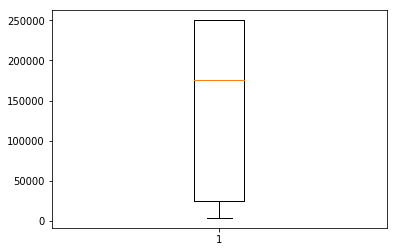

In [13]:
import matplotlib.pyplot as plt
#y=list(chile.population)
plt.boxplot(chile.population)
plt.show();

### Grouping Data

Group by is an interesting measure available in pandas which can help us figure out effect of different categorical attributes on other data variables. Let’s see an example on the same dataset where we want to figure out affect of people’s age and education on the voting dataset.

In [14]:
chile.groupby(["education","vote"]).mean()

population        age        income  statusquo
education vote                                                   
P         A     141538.461538  40.653846  19489.795918  -0.207768
          N     148312.969925  43.018797  16650.763359  -0.926576
          U     129518.581081  46.091525  16783.216783   0.082548
          Y     107316.350711  44.902844  18469.512195   0.938229
PS        A     183476.562500  31.718750  48467.741935  -0.237501
          N     184492.187500  33.071429  63238.636364  -0.934572
          U     174447.115385  33.634615  58281.250000  -0.062994
          Y     179653.846154  35.469231  88252.032520   1.058944
S         A     161225.728155  32.029126  35176.767677  -0.165996
          N     175771.410579  32.438287  36071.428571  -0.885498
          U     175047.468354  34.489451  30325.112108   0.007525
          Y     144192.122186  35.993569  39975.328947   0.898503

### ANOVA
ANOVA stands for Analysis of Variance. It is performed to figure out the relation between the different group of categorical data.
> Under ANOVA we have two measures as result:
>> F-testscore : which shows the variaton of groups mean over variation

>> p-value: it shows the importance of the result

This can be performed using python module scipy method name f_oneway()

In [15]:
import scipy.stats as st
st.f_oneway(chile["population"],chile["age"])

F_onewayResult(statistic=nan, pvalue=nan)

### Correlation and Correlation computation
Correlation is a simple relationship between two variables in a context such that one variable affects the other. Correlation is different from act of causing. One way to calculate correlation among variables is to find Pearson correlation. Here we find two parameters namely, Pearson coefficient and p-value. We can say there is a strong correlation between two variables when Pearson correlation coefficient is close to either 1 or -1 and the p-value is less than 0.0001.


Scipy module also provides a method to perform pearson correlation analysis


In [3]:
import scipy.stats as st
st.pearsonr(chile["population"],chile["age"].dropna())

ValueError: operands could not be broadcast together with shapes (2700,) (2699,) 

In [18]:
chile.isnull().sum()

region          0
population      0
sex             0
age             1
education      11
income         98
statusquo      17
vote          168
dtype: int64